**Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Importing Dataset**

In [4]:
df = pd.read_csv("Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Converting Genre(Categorical values) into boolean values**

In [7]:
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

In [8]:
print(df.head())

   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1      0   19                  15                      39
1           2      0   21                  15                      81
2           3      1   20                  16                       6
3           4      1   23                  16                      77
4           5      1   31                  17                      40


In [9]:
df.dtypes

CustomerID                int64
Genre                     int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [10]:
df.size

1000

In [11]:
df.describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


**Data Visualization**

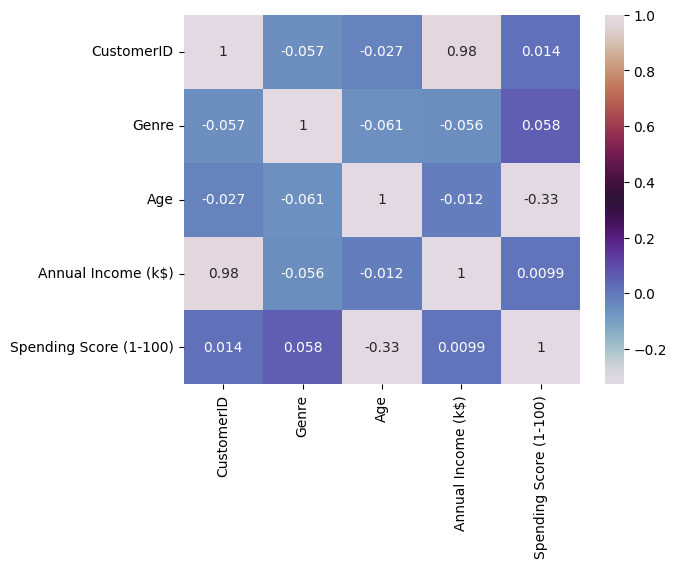

In [12]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='twilight')
plt.show()

*I used **StandardScaler** to normalize the features, ensuring they have a mean of 0 and a standard deviation of 1. This helps K-Means clustering perform better by treating all features equally, preventing bias from larger-scaled variables.*

**Standardizing Dataset**

In [13]:
sc = StandardScaler()
dataset = sc.fit_transform(df)

In [14]:
dataset[:5]

array([[-1.7234121 , -1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137, -1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065,  0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992,  0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 ,  0.88640526, -0.56336851, -1.66266033, -0.39597992]])

**Elbow Method to find optimal number of clusters**

C:\Users\SRILAKSHMI KOKANTI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SRILAKSHMI KOKANTI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SRILAKSHMI KOKANTI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SRILAKSHMI KOKANTI\AppData\Local\Prog

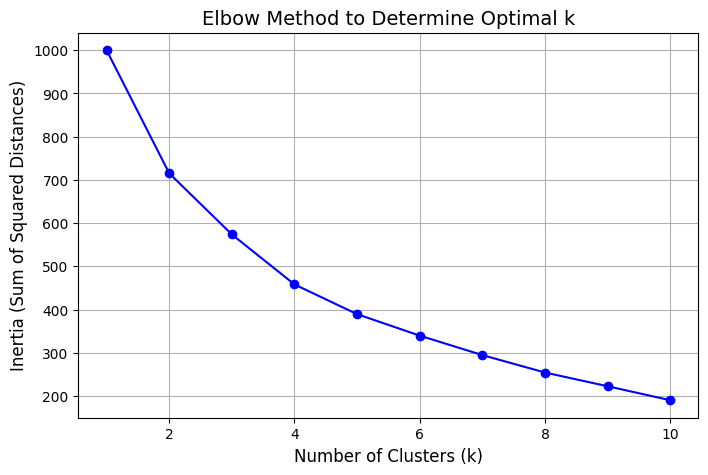

In [15]:
inertia = []  # List to store inertia values for each k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(dataset)
    inertia.append(kmeans.inertia_)  # Inertia measures how well clusters fit
    
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, 'bo-')
plt.title('Elbow Method to Determine Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=12)
plt.grid(True)
plt.show()

**Evaluating Clustering Performance with Silhouette Score**

In [16]:
from sklearn.metrics import silhouette_score

C:\Users\SRILAKSHMI KOKANTI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SRILAKSHMI KOKANTI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SRILAKSHMI KOKANTI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SRILAKSHMI KOKANTI\AppData\Local\Prog

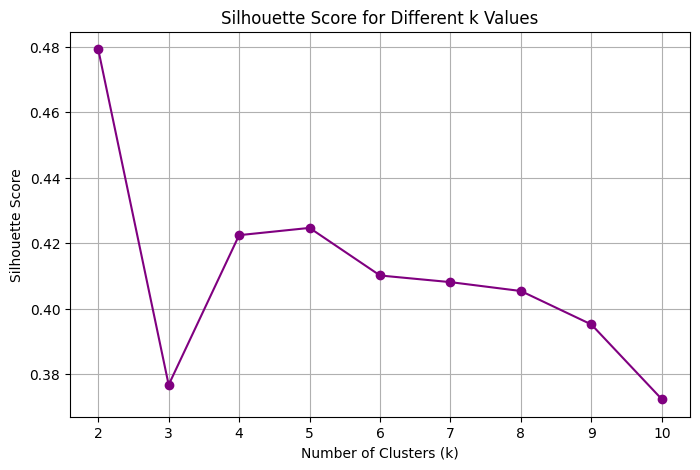

In [17]:
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(df)
    score = silhouette_score(df, cluster_labels)
    silhouette_scores.append(score)
    
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'bo-', color='purple')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.grid(True)
plt.show()

*I plotted **Number of Clusters vs Inertia and Silhouette Score** to identify the optimal number of clusters. The **Elbow Method** (inertia) helps detect the point where adding more clusters doesn’t significantly reduce within-cluster variance, while the **Silhouette Score** measures cluster cohesion and separation for better clustering performance.*

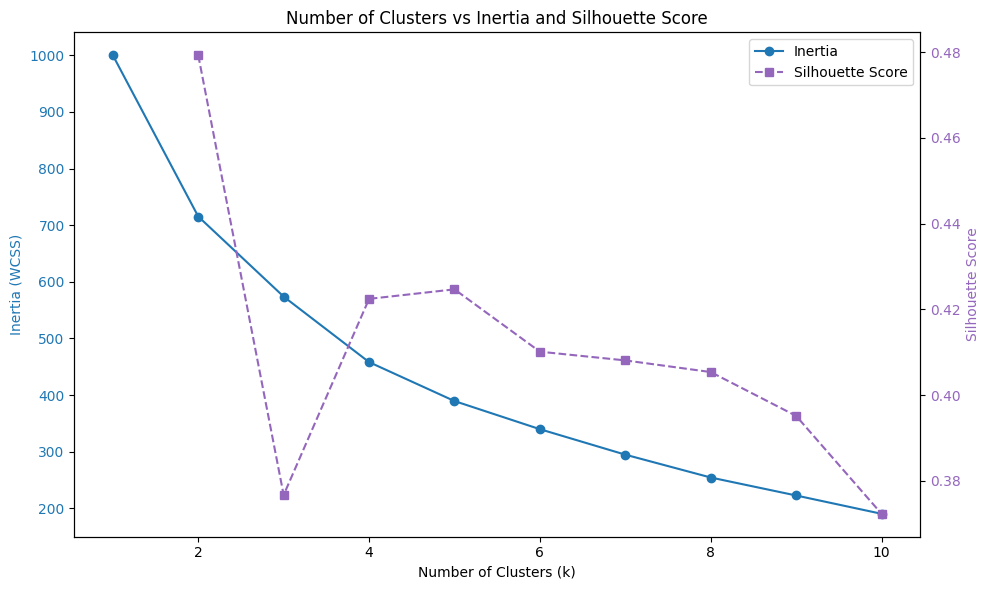

In [18]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (WCSS)', color=color)
ax1.plot(range(1, 11), inertia, 'o-', color=color, label='Inertia')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:purple'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(range(2, 11), silhouette_scores, 's--', color=color, label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Number of Clusters vs Inertia and Silhouette Score')
fig.tight_layout()

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.show()

*I performed **PCA (Principal Component Analysis)** to reduce the dimensionality of the dataset, simplifying visualization and speeding up computations. It helps highlight the most important features while retaining maximum variance for better clustering performance.*

In [19]:
from sklearn.decomposition import PCA

**Dimensionality Reduction using Principal Component Analysis (PCA)**

In [20]:
#PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(dataset)

**K-Means Clustering Implementation**

C:\Users\SRILAKSHMI KOKANTI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


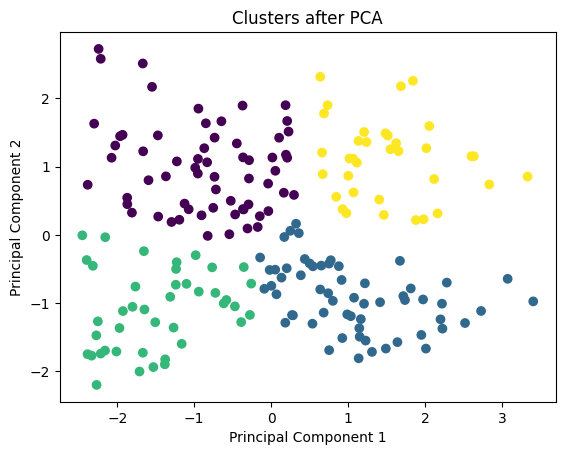

In [21]:
#KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_components)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters after PCA')
plt.show()

In [23]:
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar()
    plt.show()

**Affinity Propagation:**

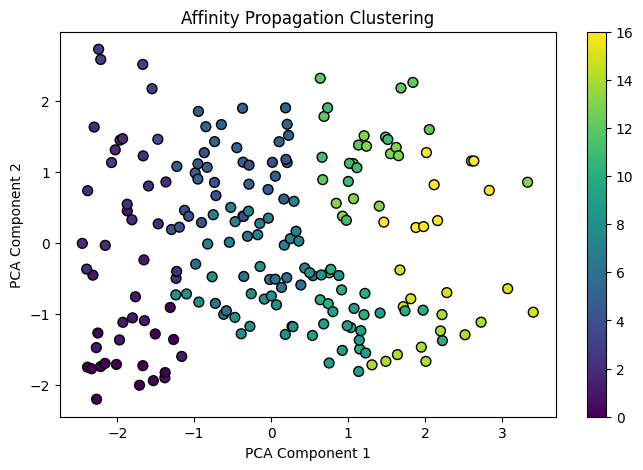

In [30]:
from sklearn.cluster import AffinityPropagation
affinity_model = AffinityPropagation(random_state=42)
affinity_labels = affinity_model.fit_predict(dataset)
plot_clusters(pca_components, affinity_labels, 'Affinity Propagation Clustering')

**DBSCAN:**

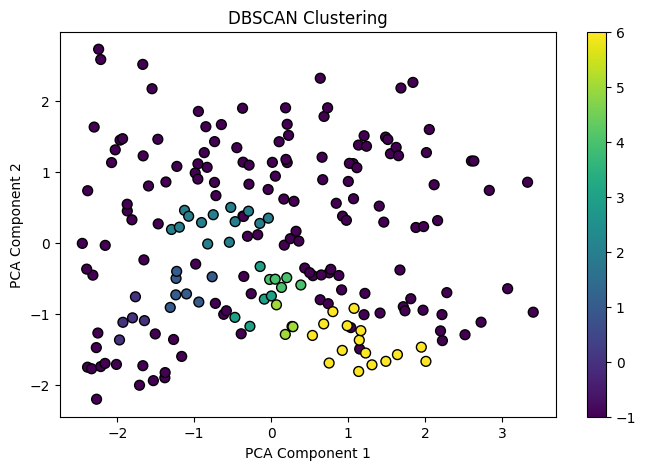

In [31]:
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(dataset)
plot_clusters(pca_components, dbscan_labels, 'DBSCAN Clustering')

**Gaussian Mixtures:**

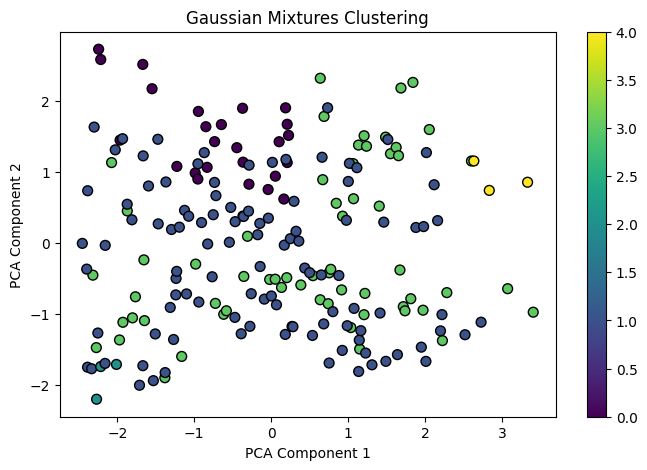

In [32]:
from sklearn.mixture import GaussianMixture
gmm_model = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm_model.fit_predict(dataset)
plot_clusters(pca_components, gmm_labels, 'Gaussian Mixtures Clustering')     

C:\Users\SRILAKSHMI KOKANTI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


     Clustering Algorithm  Silhouette Score
0      K-Means Clustering          0.406681
1    Affinity Propagation          0.377069
2       DBSCAN Clustering         -0.128701
3  Gaussian Mixture Model          0.391467


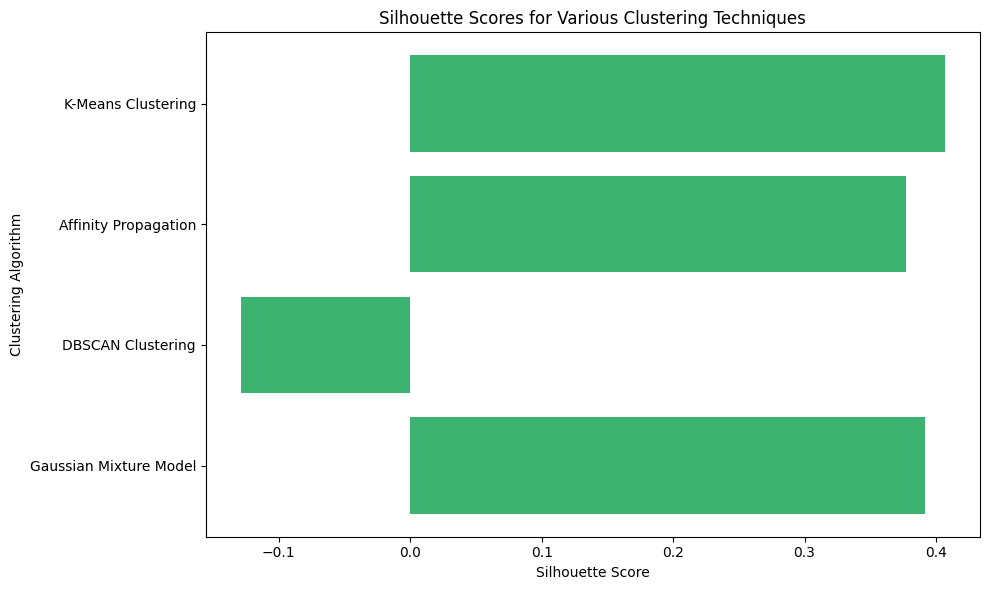

In [33]:
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

clustering_models = [
    ("K-Means Clustering", KMeans(n_clusters=k, random_state=42)),
    ("Affinity Propagation", AffinityPropagation(damping=0.5, random_state=42)),
    ("DBSCAN Clustering", DBSCAN(eps=0.5, min_samples=5)),
    ("Gaussian Mixture Model", GaussianMixture(n_components=k, random_state=42)),
]

model_names = []
silhouette_results = []

for model_name, clustering_model in clustering_models:
    predicted_labels = clustering_model.fit_predict(dataset)
    avg_silhouette = silhouette_score(dataset, predicted_labels)
    model_names.append(model_name)
    silhouette_results.append(avg_silhouette)

clustering_results_df = pd.DataFrame({
    'Clustering Algorithm': model_names,
    'Silhouette Score': silhouette_results
})

print(clustering_results_df)

plt.figure(figsize=(10, 6))
plt.barh(clustering_results_df['Clustering Algorithm'], clustering_results_df['Silhouette Score'], color='mediumseagreen')
plt.xlabel('Silhouette Score')
plt.ylabel('Clustering Algorithm')
plt.title('Silhouette Scores for Various Clustering Techniques')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

*In this comparison of clustering algorithms, **K-Means** outperformed the other methods, achieving the highest **Silhouette Score**, indicating better-defined clusters. While **Affinity Propagation**, **DBSCAN**, and **Gaussian Mixture Models** provided valuable insights, they showed more variation in their clustering performance. Overall, K-Means proved to be the most consistent and effective algorithm for this dataset.*